In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from descriptors import *
from vlad import *

sns.set(font_scale=0.6)

### Chargement des images et labels

In [2]:
images_folder = "../data/caltech101_subset"
files_path = "../data/caltech101_subset/caltech101_subset.files"

image_files = []
labels = []
with open(files_path, "r") as f:
    for line in f:
        filename, label = line.strip().split()
        image_files.append(os.path.join(images_folder, filename))
        labels.append(label)

print(f"Nombre d'images : {len(image_files)}")
print(f"Classes : {sorted(set(labels))}")


Nombre d'images : 1000
Classes : ['Faces_easy', 'Leopards', 'Motorbikes', 'airplanes', 'bonsai', 'car_side', 'chandelier', 'hawksbill', 'ketch', 'watch']


### SIFT

In [3]:
each_class = {}
for l in set(labels):
    idx = np.where(np.array(labels) == l)[0]
    each_class[l] = idx

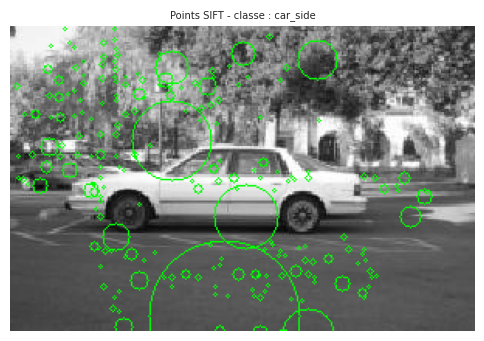

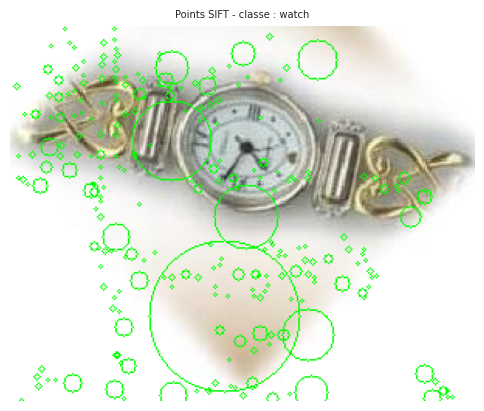

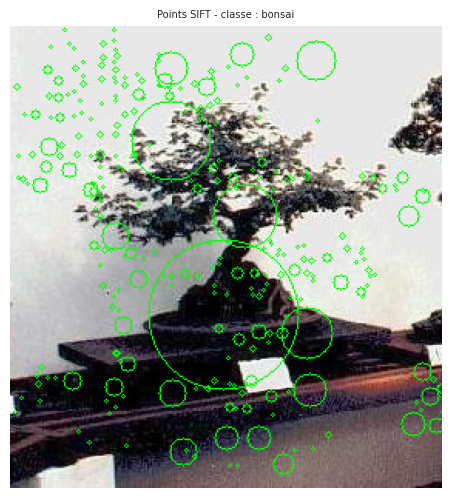

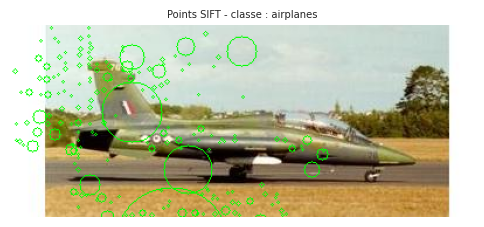

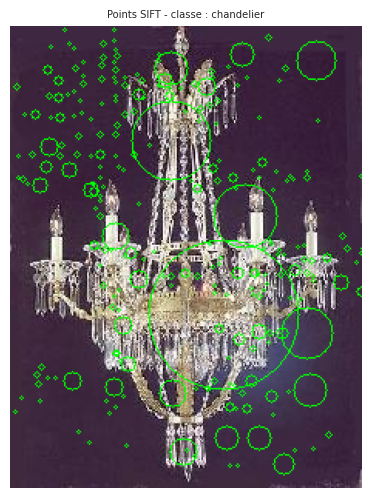

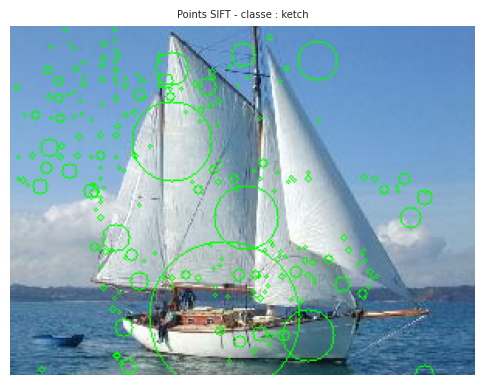

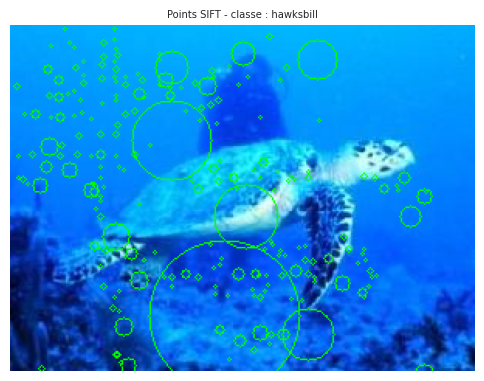

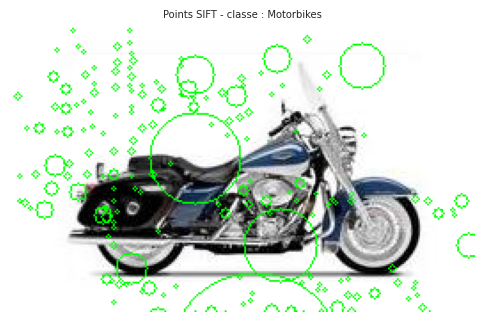

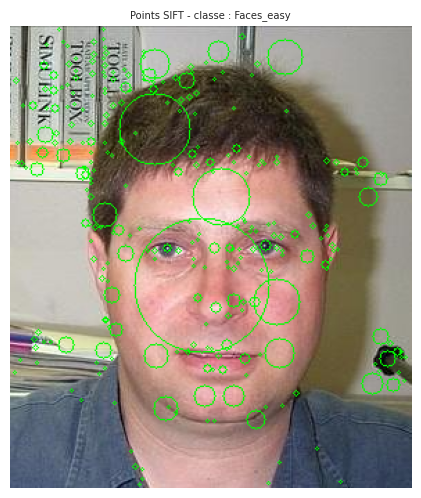

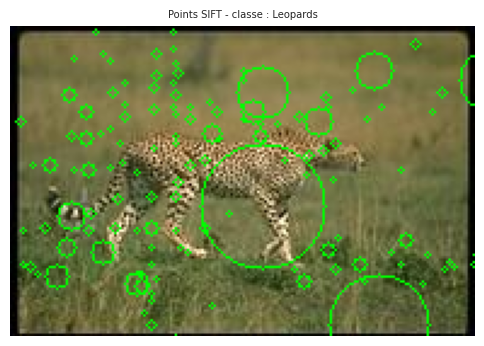

In [4]:

keypoints_list, descriptors_list = sift_descriptors(image_files)
for label, idx in each_class.items():
    sample_img = cv2.imread(image_files[idx[0]])
    img_kp = draw_sift_keypoints(sample_img, keypoints_list[0])
    
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(f"Points SIFT - classe : {label}")
    plt.axis('off')
    plt.show()

### Sac de mots visuels (BoW)

Taille des descripteurs BoW : (1000, 5000)
Accuracy BoW : 0.69


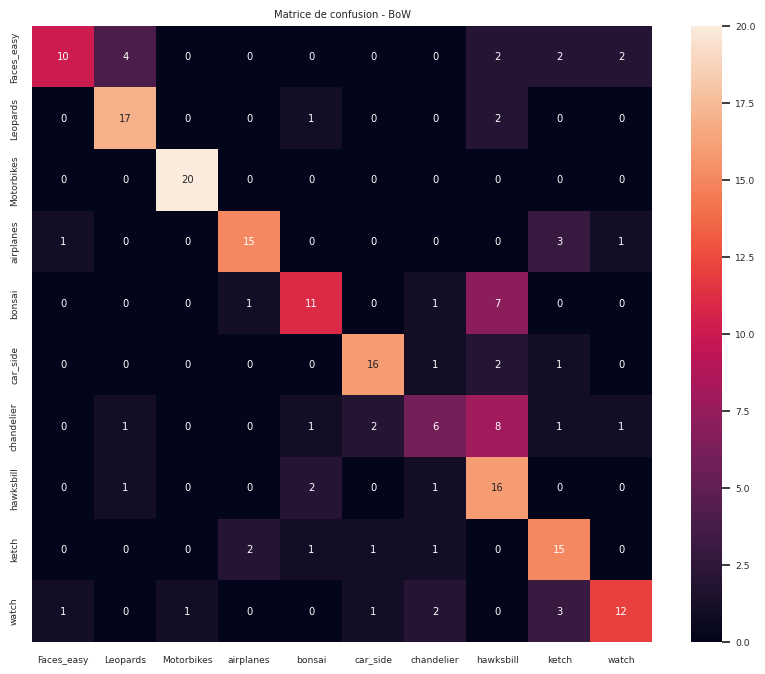

In [5]:
# Chargement du vocabulaire (ex: 5000 mots)
vocabulary_bow = np.load("../data/vocabularies_sift/vocabulary_5000.npy")  # fichier fourni sur Moodle

# Calcul des histograms BoW
bow_desc = bow_descriptors(descriptors_list, vocabulary_bow)
print("Taille des descripteurs BoW :", bow_desc.shape)

# Classification
acc_bow, cm_bow, _, _ = train_test(bow_desc, labels)
print("Accuracy BoW :", acc_bow)

plt.figure(figsize=(10,8))
sns.heatmap(cm_bow, annot=True, fmt='d', xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
plt.title("Matrice de confusion - BoW")
plt.show()


### VLAD

Taille des descripteurs VLAD : (1000, 6400)
Accuracy VLAD : 0.79


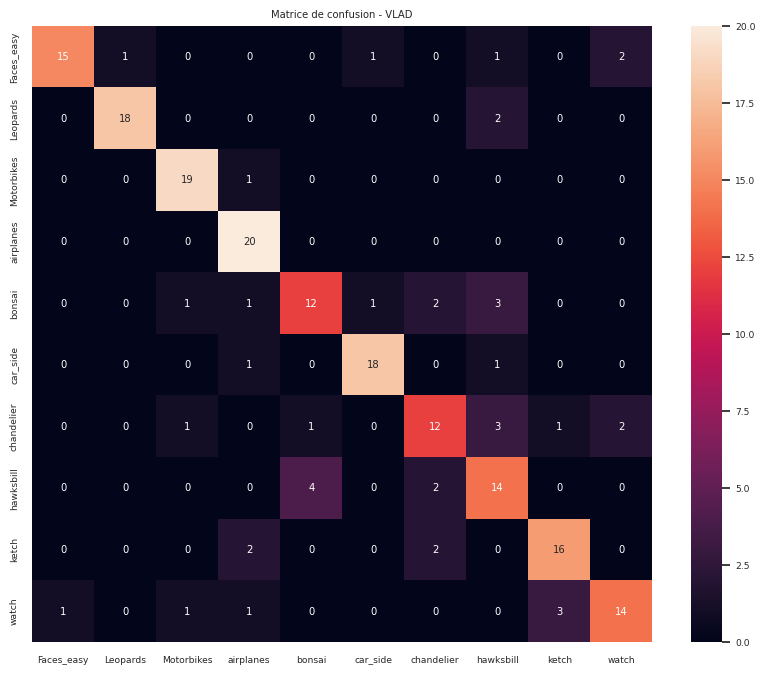

In [6]:
# Chargement vocabulaire VLAD (ex: 50 mots)
vocabulary_vlad = np.load("../data/vocabularies_sift/vocabulary_50.npy")  # fichier fourni sur Moodle

# Calcul des vecteurs VLAD
vlad_desc = vlad_descriptors(descriptors_list, vocabulary_vlad, vlad)
print("Taille des descripteurs VLAD :", vlad_desc.shape)

# Classification
acc_vlad, cm_vlad, _, _ = train_test(vlad_desc, labels)
print("Accuracy VLAD :", acc_vlad)

plt.figure(figsize=(10,8))
sns.heatmap(cm_vlad, annot=True, fmt='d', xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
plt.title("Matrice de confusion - VLAD")
plt.show()


### VLAD + PCA

In [7]:
vlad_reduced = reduce_vlad_dimension(vlad_desc, n_components=100)
print("Taille des descripteurs VLAD réduits :", vlad_reduced.shape)

# Classification
acc_vlad_pca, cm_vlad_pca, _, _ = train_test(vlad_reduced, labels)
print("Accuracy VLAD PCA 100D :", acc_vlad_pca)


Taille des descripteurs VLAD réduits : (1000, 100)
Accuracy VLAD PCA 100D : 0.775


### Découpage en grille (5x5)

In [8]:
# Exemple avec BoW sur grille 5x5
grid_bow_desc = []
grid_size = (5,5)
for desc, kp_list in zip(descriptors_list, keypoints_list):
    # ici on pourrait découper l'image et recomputer BoW sur chaque région
    # mais pour simplification on concatène 5x5 fois le BoW global (placeholder)
    grid_bow_desc.append(np.tile(bow_histogram(desc, vocabulary_bow), grid_size[0]*grid_size[1]))
grid_bow_desc = np.array(grid_bow_desc, dtype=np.float32)

acc_grid_bow, cm_grid_bow, _, _ = train_test(grid_bow_desc, labels)
print("Accuracy BoW grille :", acc_grid_bow)


Accuracy BoW grille : 0.715
